In [82]:
#=====================================================================================================================#
#This code is to analysis the training data, do feature engineering and train the model of result and goal diff.
#The files used in the code is 2022/2018 training data.csv (encoding="utf-8-sig"),which can be find in the folder.
#The final training model,"result_classification.pkl" and "goal_diff_reg.pkl" is saved to the folder same as the codel
#=====================================================================================================================#

In [83]:
from sklearnex import patch_sklearn                         #intel 加速補丁
patch_sklearn()                                             #此行後所有import的sklearn package 都會優先導入優化版本
import numpy as np                                         
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [84]:
result_18=pd.read_csv("2018 training data.csv",encoding="utf-8-sig").drop(["Unnamed: 0"],axis=1)
result_22=pd.read_csv("2022 training data.csv",encoding="utf-8-sig").drop(["Unnamed: 0"],axis=1)
display(result_18)
display(result_22)

Home Team Name  Home Team Goals  Away Team Goals  Away Team Name  \
0           Russia                5                0    Saudi Arabia   
1            Egypt                0                1         Uruguay   
2         Portugal                3                3           Spain   
3          Morocco                0                1         IR Iran   
4           France                2                1       Australia   
5             Peru                0                1         Denmark   
6        Argentina                1                1         Iceland   
7          Croatia                2                0         Nigeria   
8           Brazil                1                1     Switzerland   
9       Costa Rica                0                1          Serbia   
10         Germany                0                1          Mexico   
11          Sweden                1                0  Korea Republic   
12         Belgium                3                0          Panama   
13         Tunisia                1                2         England   
14          Poland                1                2         Senegal   
15        Colombia                1                2           Japan   
16          Russia                3                1           Egypt   
17         Uruguay                1                0    Saudi Arabia   
18        Portugal                1                0         Morocco   
19         IR Iran                0                1           Spain   
20          France                1                0            Peru   
21         Denmark                1                1       Australia   
22       Argentina                0                3          France   
23         Nigeria                2                0         Iceland   
24          Brazil                2                0      Costa Rica   
25          Serbia                1                2     Switzerland   
26         Germany                2                1          Sweden   
27  Korea Republic                1                2          Mexico   
28         Belgium                5                2         Tunisia   
29         England                6                1          Panama   
30          Poland                0                3        Colombia   
31           Japan                2                2         Senegal   
32         Uruguay                3                0          Russia   
33    Saudi Arabia                2                1           Egypt   
34         IR Iran                1                1        Portugal   
35           Spain                2                2         Morocco   
36         Denmark                0                0          France   
37       Australia                0                2            Peru   
38         Nigeria                1                2       Argentina   
39         Iceland                1                2         Croatia   
40          Serbia                0                2          Brazil   
41     Switzerland                2                2      Costa Rica   
42  Korea Republic                2                0         Germany   
43          Mexico                0                3          Sweden   
44         England                0                1         Belgium   
45          Panama                1                2         Tunisia   
46           Japan                0                1          Poland   
47         Senegal                0                1        Colombia   
48         Uruguay                2                1        Portugal   
49          France                4                3       Argentina   
50           Spain                1                1          Russia   
51         Croatia                1                1         Denmark   
52          Brazil                2                0          Mexico   
53         Belgium                3                2           Japan   
54          Sweden                1         

Home Team Name  Home Team Goals  Away Team Goals  Away Team Name  \
0        Argentina                3                3          France   
1            Qatar                0                2         Ecuador   
2          Senegal                0                2     Netherlands   
3            Qatar                1                3         Senegal   
4      Netherlands                1                1         Ecuador   
5      Netherlands                2                0           Qatar   
6          Ecuador                1                2         Senegal   
7          England                6                2         IR Iran   
8              USA                1                1           Wales   
9            Wales                0                2         IR Iran   
10         England                0                0             USA   
11           Wales                0                3         England   
12         IR Iran                0                1             USA   
13       Argentina                1                2    Saudi Arabia   
14          Mexico                0                0          Poland   
15          Poland                2                0    Saudi Arabia   
16       Argentina                2                0          Mexico   
17          Poland                0                2       Argentina   
18    Saudi Arabia                1                2          Mexico   
19         Denmark                0                0         Tunisia   
20          France                4                1       Australia   
21         Tunisia                0                1       Australia   
22          France                2                1         Denmark   
23       Australia                1                0         Denmark   
24         Tunisia                1                0          France   
25         Germany                1                2           Japan   
26           Spain                7                0      Costa Rica   
27           Japan                0                1      Costa Rica   
28           Spain                1                1         Germany   
29           Japan                2                1           Spain   
30      Costa Rica                2                4         Germany   
31         Morocco                0                0         Croatia   
32         Belgium                1                0          Canada   
33         Belgium                0                2         Morocco   
34         Croatia                4                1          Canada   
35         Croatia                0                0         Belgium   
36          Canada                1                2         Morocco   
37     Switzerland                1                0        Cameroon   
38          Brazil                2                0          Serbia   
39        Cameroon                3                3          Serbia   
40          Brazil                1                0     Switzerland   
41          Serbia                2                3     Switzerland   
42        Cameroon                1                0          Brazil   
43         Uruguay                0                0  Korea Republic   
44        Portugal                3                2           Ghana   
45  Korea Republic                2                3           Ghana   
46        Portugal                2                0         Uruguay   
47           Ghana                0                2         Uruguay   
48  Korea Republic                2                1        Portugal   
49         Croatia                2                1         Morocco   
50         Croatia                1                1          Brazil   
51     Netherlands                2                2       Argentina   
52         Morocco                1                0        Portugal   
53         England                1                2          France   
54     Netherlands                3         

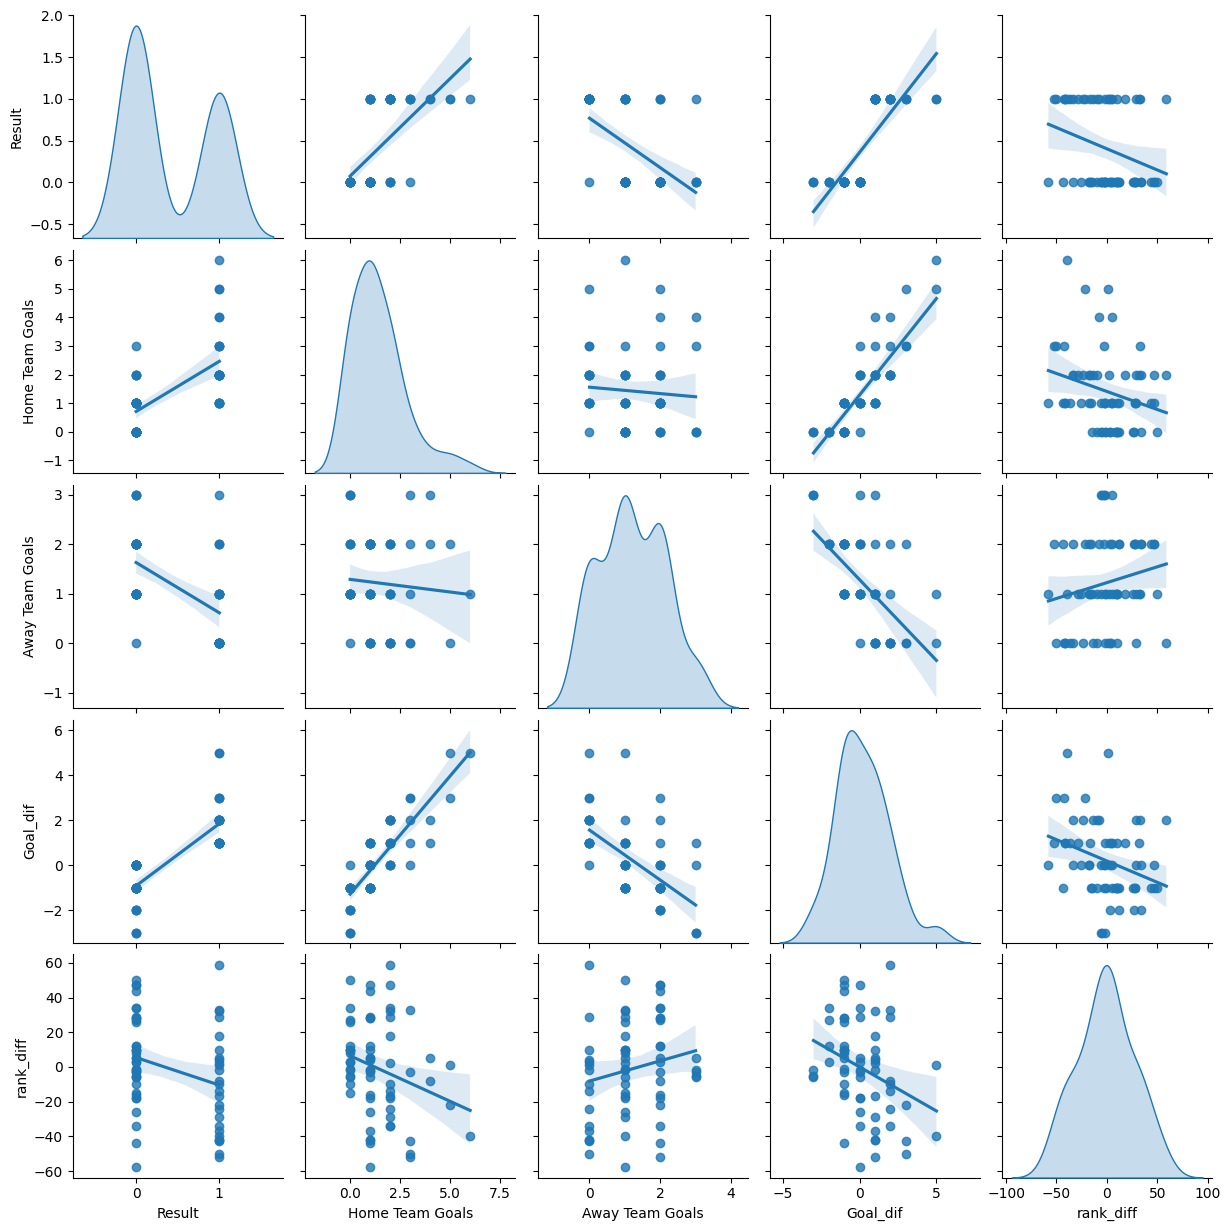

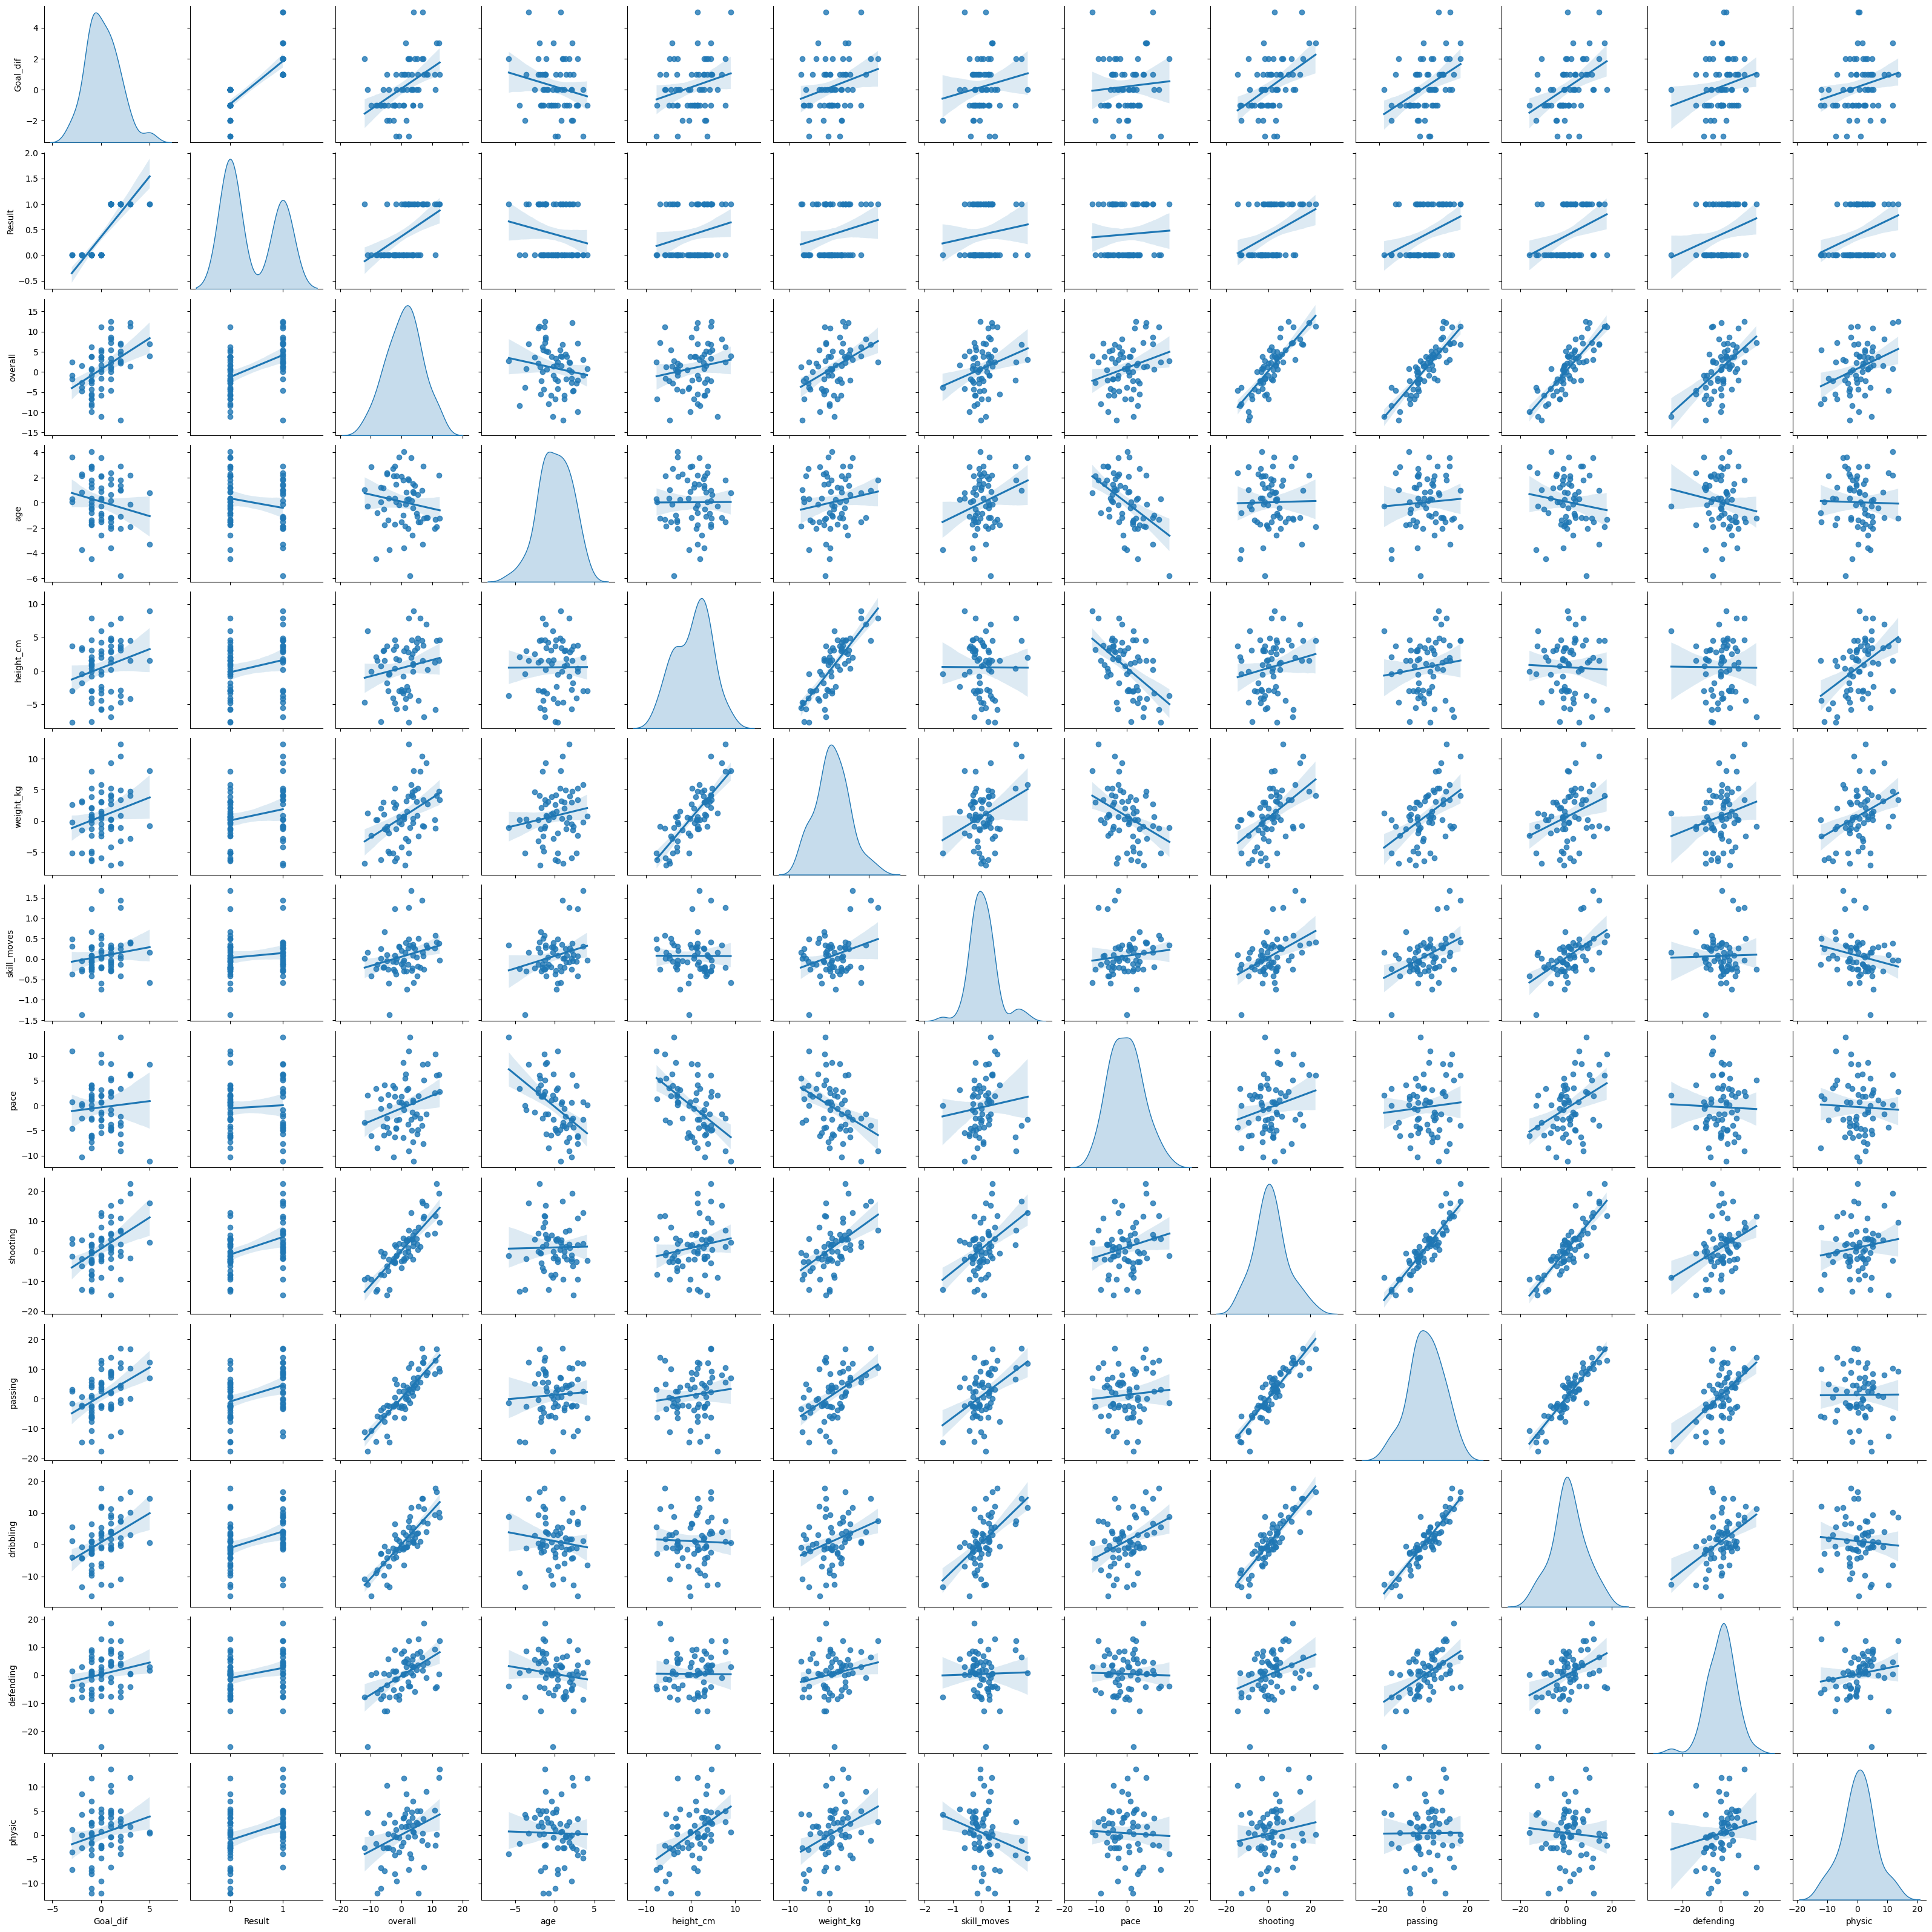

In [85]:
#label=list(result_18.columns.values)
label=['Result','Home Team Goals', 'Away Team Goals', 'Goal_dif', 'overall', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'rank_diff']
game_result=['Result','Home Team Goals', 'Away Team Goals', 'Goal_dif','rank_diff']
ability_result=['Goal_dif','Result','overall', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
specific_result=[ 'Goal_dif','Result','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
#print(label)
sns.pairplot(result_18[game_result],kind='reg',diag_kind='kde')
sns.pairplot(result_18[ability_result],kind='reg',diag_kind='kde')
#sns.pairplot(result_18[specific_result],kind='reg',diag_kind='kde')

Goal diff: '
' Index(['Result', 'Home Team Goals', 'Away Team Goals', 'Goal_dif', 'overall',
       'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_reactions', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_composure', 'goalkeeping_speed', 'rank_diff'],
      dtype='object')
Result: '
' Index(['Result', 'Home Team Goals', 'Goal_dif', 'overall', 'height_cm',
       'weight_kg', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_r

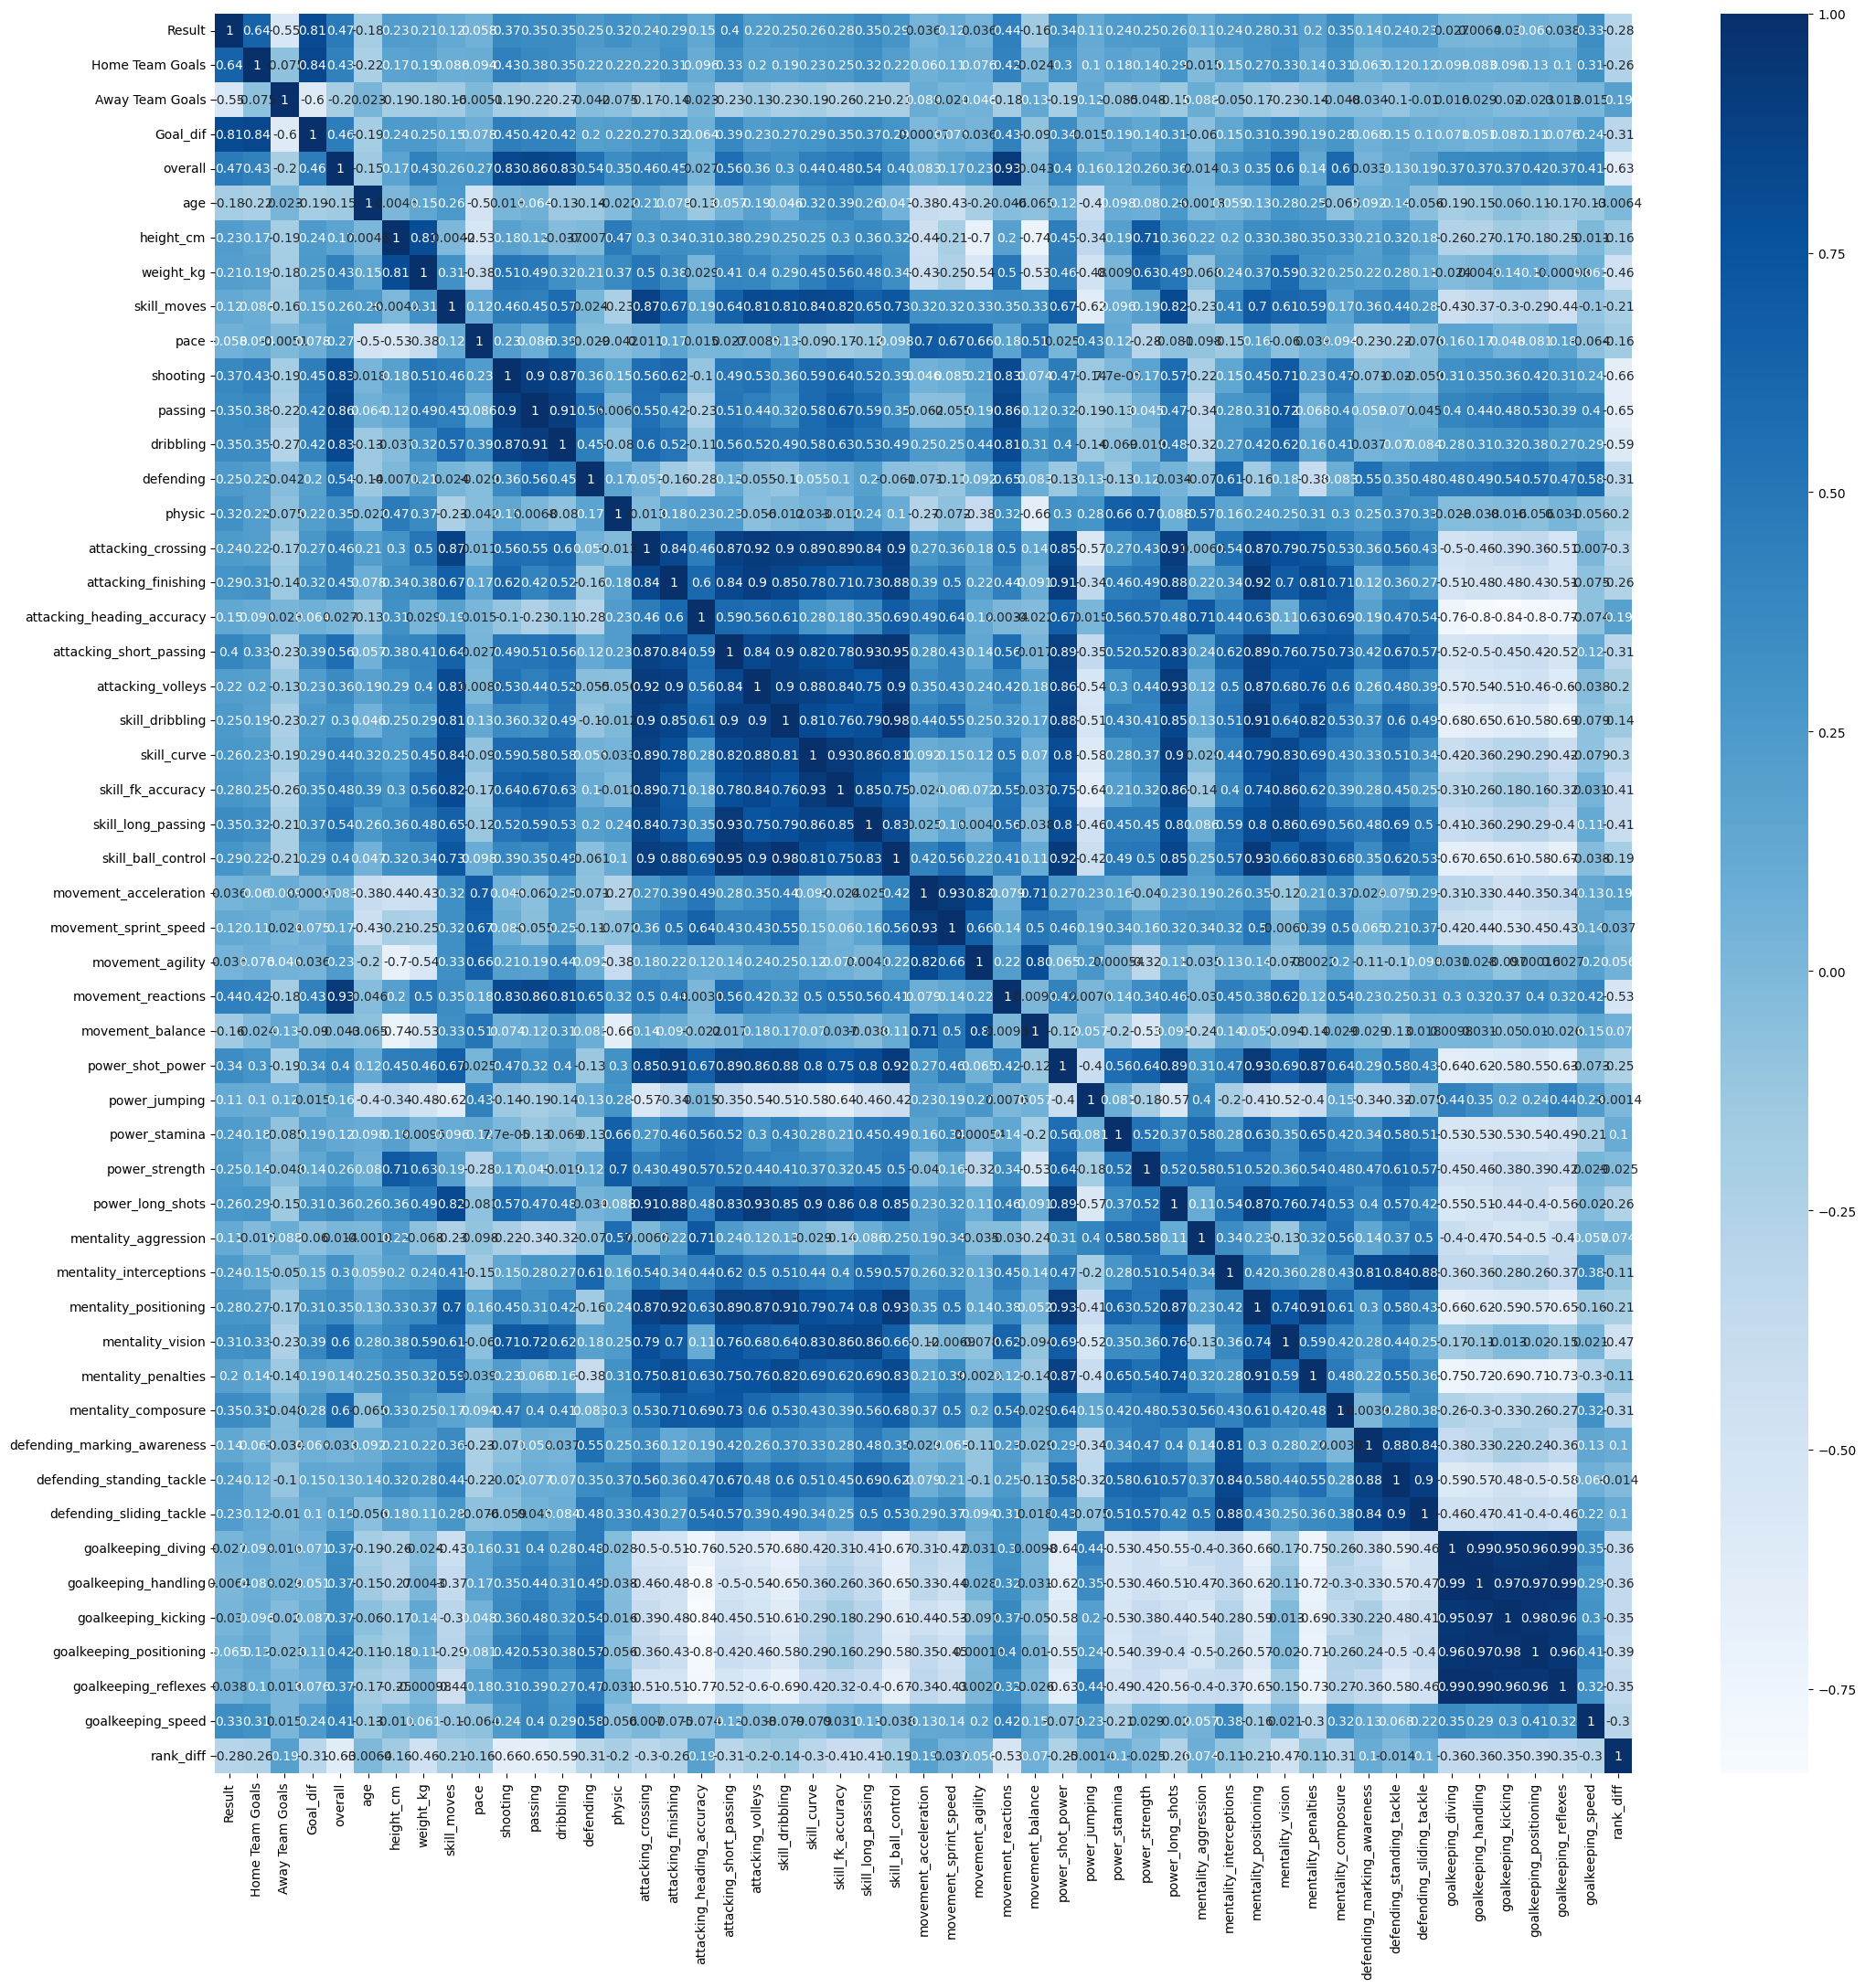

In [86]:
correlation=result_18[label].corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True,vmax=1,cmap="Blues")
goal_dif_corr=correlation.index[abs(correlation['Goal_dif'])>0.2]
result_corr=correlation.index[abs(correlation["Result"]>0.2)]
print("Goal diff: '\n'",goal_dif_corr)
print("Result: '\n'",result_corr)

#0.2
goal_dif_label=['Result', 'overall',
       'height_cm', 'weight_kg', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_reactions', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_composure', 'goalkeeping_speed', 'rank_diff']
result_label=['overall', 'height_cm',
       'weight_kg', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_reactions', 'power_shot_power', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_composure',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_speed']

In [87]:
# Result prediction grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib
from sklearn.ensemble import RandomForestRegressor
y=result_18["Result"]
x=result_18[result_label]
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
model=RandomForestClassifier()
RFC_para={'n_estimators':np.arange(100,1000,100),'criterion':('gini','entropy','log_loss'),"max_features":("sqrt",'log2')}
RFC_grid=GridSearchCV(estimator=model,param_grid=RFC_para,cv=5,verbose=3)
RFC_grid.fit(X_train,y_train)
print("Best estimator: ",RFC_grid.best_estimator_)
print("Best score: ",RFC_grid.best_score_)
print("Best para: ",RFC_grid.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.636 total time=   0.0s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.500 total time=   0.0s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.500 total time=   0.0s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.600 total time=   0.0s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.600 total time=   0.0s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.636 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.500 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.600 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.700 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estima

In [88]:
#Goal Diff prediction grid search
y=result_18['Goal_dif']
x=result_18[goal_dif_label]
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
model=RandomForestRegressor()
para={"n_estimators":np.arange(100,1000,100),"criterion":("squared_error",'absolute_error','friedman_mse'),"max_features":("sqrt",'log2')}
RFR_grid=GridSearchCV(estimator=model,param_grid=para,cv=5,verbose=2)
RFR_grid.fit(X_train,y_train)
print("Best estimator: ",RFR_grid.best_estimator_)
print("Best score: ",RFR_grid.best_score_)
print("Best para: ",RFR_grid.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_

In [89]:
#result model 
y=result_18["Result"]
x=result_18[result_label]

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)

RFC=RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=100)
RFC.fit(X_train,y_train)
score=RFC.score(X_test,y_test)

print("2018 test score: ",score)

y_22=result_22["Result"]

x_22=result_22[result_label]
score=RFC.score(x_22,y_22)
print("2022 test score: ",score)
display(RFC.predict(x_22))
display(y_22.to_numpy())
#joblib.dump(RFC,'result_classification.pkl')        #Save the training model

2018 test score:  0.6923076923076923
2022 test score:  0.71875


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
      dtype=int64)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [90]:
#goal diff model
y=result_18['Goal_dif']
x=result_18[goal_dif_label]
#display(x)
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
RFR=RandomForestRegressor(criterion='absolute_error', max_depth=80, max_features='sqrt', n_estimators=500)
RFR.fit(X_train,y_train)
score=RFR.score(X_test,y_test)
print("2018 test score: ",score)

y_22=result_22["Goal_dif"]
x_22=result_22[goal_dif_label]
score=RFR.score(x_22,y_22)
print("2022 test score: ",score)
display(RFR.predict(x_22))
display(y_22.to_numpy())
#joblib.dump(RFR,'goal_diff_reg.pkl')        #Save the training model

2018 test score:  0.4569859259259258
2022 test score:  0.5024015784341842


array([-1.016, -0.018, -0.68 , -0.406,  0.982,  1.428, -0.892,  2.084,
       -0.34 , -0.798,  0.594, -0.742, -0.946,  0.97 , -0.078,  1.278,
        1.262, -0.922, -0.832,  0.076,  1.896, -0.282,  1.206,  0.342,
        0.174, -0.092,  1.374, -0.274, -0.352,  0.548, -0.334, -1.142,
        1.83 , -0.266,  1.588, -0.854, -0.836,  1.426,  0.364, -0.826,
        0.56 , -0.526,  0.214,  0.15 ,  2.724, -0.604,  1.132, -0.796,
        0.438,  0.842, -0.29 , -1.092,  0.186, -0.402,  1.294,  2.15 ,
        1.506,  2.24 , -0.792,  1.066, -0.54 ,  1.67 ,  1.358,  1.188])

array([ 0, -2, -2, -2,  0,  2, -1,  4,  0, -2,  0, -3, -1, -1,  0,  2,  2,
       -2, -1,  0,  3, -1,  1,  1,  1, -1,  7, -1,  0,  1, -2,  0,  1, -2,
        3,  0, -1,  1,  2,  0,  1, -1,  1,  0,  1, -1,  2, -2,  1,  1,  0,
        0,  1, -1,  2,  1,  2,  3,  0,  3,  0,  5,  3,  2], dtype=int64)